# Training Word2Vec model








In [63]:
# common
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# languages
from underthesea import word_tokenize

#Modeling packages
from sklearn.model_selection import train_test_split

# Word2vec
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors


In [64]:
# import data
df_new=pd.read_excel('data')


In [65]:
df_new['comment'].head(20)

0                           v·∫£i th√¥, kh√¥ng m·ªÅm, b·ªã b·∫°c.
1                      V·∫£i d√†y m·ªãn √°o y h√¨nh r·∫•t ƒë·∫πp‚ù§Ô∏è.
2     M·∫∑c ƒëi ch∆°i kh√¥ng ƒë∆∞·ª£c, m·∫∑c ·ªü nh√† c≈©ng kh√¥ng x...
3             √Åo ch·∫≠t ng·∫Øn trong khi m√¨nh l√† ng∆∞·ªùi g·∫ßy.
4                                              B·ªô ch·∫∑t.
5         May v·ªõt v·ªôi c√°i √°o tr·∫Øng ch·ª© ko h·ªèng lu√¥n √°o.
6                                  ƒê√¢y l√† t·∫•t cao c·ªï √†?
7                              M√† r·∫ª z b·∫£o sao v·∫£i ƒë·∫πp.
8                            Ch·∫•t v·∫£i kh√¥ng ƒë∆∞·ª£c ƒë·∫πp...
9                                        ƒê∆∞·ªùng may x·∫•u.
10                Ch·ªØ black h∆°i to kh√¥ng gi·ªëng ·∫£nh l·∫Øm.
11            ƒê·∫∑t l·∫°i sz S m√† v·∫´n ship sai M cho m√¨nh .
12                                         √Åo v·∫£i c·ª©ng.
13    Nh√¨n h√¨nh t∆∞·ªüng √°o m√†u tr·∫Øng tinh nh∆∞ng l·∫°i l√†...
14    Giao h√†ng nhanh ƒë·ªì r·∫•t ƒë·∫πp, ƒë·∫∑t m√†u cam nh∆∞ng ...
1

In [66]:
# WORD2VEC 
W2V_SIZE = 400
W2V_WINDOW = 10 # max distance bt the current and predicted
W2V_EPOCH = 35 
W2V_MIN_COUNT = 5 # Ignore word frequence < n
SEED = 567 # random


In [67]:
# Word2Vec model using Bag of word
w2v_model = Word2Vec(seed=SEED, 
                        vector_size=W2V_SIZE,
                        window=W2V_WINDOW,
                        min_count=W2V_MIN_COUNT
                        )

In [68]:
documents = [_text.split() for _text in df_new.comment_1.astype(str)]


In [69]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
w2v_model.build_vocab(tqdm(documents))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9904/9904 [00:00<00:00, 473713.23it/s]


In [70]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 1.57 s


(1092710, 2166955)

In [71]:
w2v_model.wv.most_similar(positive='t·ªët',topn=20)

[('r·∫•t_ƒë·∫πp', 0.7073960304260254),
 ('r·∫•t_l√†', 0.6255791187286377),
 ('d√†i_d√†i', 0.6243530511856079),
 ('r·∫•t_ok', 0.6137076020240784),
 ('r·∫•t_∆∞ng', 0.5899157524108887),
 ('r·∫•t_th√≠ch', 0.5848659873008728),
 ('r·∫•t_r·∫•t', 0.5824005603790283),
 ('r·∫•t_t·ªët', 0.5759737491607666),
 ('b·ªÅn', 0.5651699304580688),
 ('c√°m_∆°n', 0.5575745701789856),
 ('r·∫•t_t·ªët_shop', 0.5561677813529968),
 ('∆∞ng_√Ω', 0.5552457571029663),
 ('t√≥m_l·∫°i', 0.5470220446586609),
 ('g·ªçn', 0.5468549132347107),
 ('r·∫•t_t√¥n', 0.5364100337028503),
 ('c·ª±c_k√¨', 0.5278401374816895),
 ('b√†n', 0.5203929543495178),
 ('r·∫•t_sang', 0.519592821598053),
 ('r·∫•t_h√†i_l√≤ng', 0.5119981169700623),
 ('th√¢n_thi·ªán', 0.5060713291168213)]

In [74]:
w2v_model.save("w2v.model")

# Sentence2vec




In [75]:
import re
import numpy as np
from numpy import dot
from numpy.linalg import norm
from gensim.models import Word2Vec
from underthesea import word_tokenize


In [76]:
# Sentence2vec based on Word2Vec 
class Sentence2Vec:
    def __init__(self, model_file):
        self.load(model_file)

    def load(self, model_file):
        self.model = Word2Vec.load(model_file)

    def get_vector(self, sentence):
        vectors = [self.model.wv[w] for w in word_tokenize(sentence)
                   if w in self.model.wv]

        v = np.zeros(self.model.vector_size)

        if (len(vectors) > 0):
            v = (np.array([sum(x) for x in zip(*vectors)])) / v.size
        return v

    def similarity(self, x, y):
        xv = self.get_vector(x)
        yv = self.get_vector(y)

        score = 0

        if xv.size > 0 and yv.size > 0:
            score = dot(xv, yv) / (norm(xv) * norm(yv))

        return score


In [77]:
model = Sentence2Vec('w2v.model')

In [78]:
matrix = np.zeros((len(documents),W2V_SIZE))
for i in range(len(documents)):
        matrix[i] = model.get_vector(str(documents[i]))
print(matrix.shape)

(9904, 400)


# PCA to reduce dimention (40D)




In [80]:
from sklearn.decomposition import PCA

# fit a 40d PCA model to the vectors
pca = PCA(n_components=80)
PCA_result = pca.fit_transform(matrix)
print(PCA_result.shape)

(9904, 80)


# K-mean clustering

In [90]:
iteration = 20
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=iteration,normalise= True ,avoid_empty_clusters= True)
assigned_clusters = kclusterer.cluster(PCA_result, assign_clusters=True)


In [91]:
assigned_clusters = np.array(assigned_clusters)

# **Result**

In [92]:
pca = PCA(n_components=2)
PCA_new = pca.fit_transform(matrix)

In [93]:
d = {'document' : df_new["comment"], 'label':assigned_clusters, 'x': PCA_new[:,0], 'y': PCA_new[:,1]}
df = pd.DataFrame(data=d)

In [99]:
#filter rows of original data
filtered_label0 = df[assigned_clusters == 0]
filtered_label1 = df[assigned_clusters == 1]
filtered_label2 = df[assigned_clusters == 2]


In [95]:
filtered_label0.head(60)

document  label         x  \
0                          v·∫£i th√¥, kh√¥ng m·ªÅm, b·ªã b·∫°c.      0 -0.023309   
4                                             B·ªô ch·∫∑t.      0 -0.018224   
5        May v·ªõt v·ªôi c√°i √°o tr·∫Øng ch·ª© ko h·ªèng lu√¥n √°o.      0 -0.018469   
6                                 ƒê√¢y l√† t·∫•t cao c·ªï √†?      0 -0.022993   
7                             M√† r·∫ª z b·∫£o sao v·∫£i ƒë·∫πp.      0 -0.003242   
8                           Ch·∫•t v·∫£i kh√¥ng ƒë∆∞·ª£c ƒë·∫πp...      0 -0.012317   
9                                       ƒê∆∞·ªùng may x·∫•u.      0 -0.019442   
10               Ch·ªØ black h∆°i to kh√¥ng gi·ªëng ·∫£nh l·∫Øm.      0 -0.021227   
12                                        √Åo v·∫£i c·ª©ng.      0 -0.019767   
13   Nh√¨n h√¨nh t∆∞·ªüng √°o m√†u tr·∫Øng tinh nh∆∞ng l·∫°i l√†...      0 -0.016817   
16                                       V·∫£i qu√° m√µng.      0 -0.016220   
17                      Ph·∫ßn zip tr√™n t√∫i k ch·∫Øc ch·∫Øn.      0 -0.011169   
18   T√∫i nh·ªè l·∫Øm kh√¥ng d√πng ƒë∆∞∆°c cho th√πng r√°c, kh√°...      0 -0.009819   
19   M·ªèng, len gi√£n ch·∫•t l∆∞·ª£ng k√©m m·∫∑c v√†o l√¥ng x√π ...      0 -0.017350   
20   tr√°i tim ·ªü c·ªï √°o gi·ªëng h√¨nh ƒë∆∞·ª£c d√°n v√†o ch·ª© k...      0 -0.029169   
21   Qu·∫ßn v√† √°o g√≥i trong t√∫i zip ri√™ng kh√° ch·∫•t l∆∞...      0 -0.003193   
25                          M√† v√°y th√¨ l·∫°i d√†i l√™ th√™.      0 -0.020476   
31   B·ªã r√°ch m≈©, k c√≥ d√¢y ·ªü m≈© nh∆∞ h√¨nh, √°o gi√≥ 2 l...      0 -0.035146   
32   Giao 2 d√†i m√† kh√°c lo·∫°i. 1 lo·∫°i t·∫°m ƒëc 1 lo·∫°i ...      0 -0.005128   
33                       V·∫£i m·ªèng qu√° n√© m√†u tr·∫Øng ra.      0 -0.017442   
34                              M·∫∑c v√†o ƒëau ph·∫ßn n√°ch.      0 -0.023934   
35                                  √Åo b·ªã r√°ch 1 ƒëo·∫°n.      0 -0.016969   
36                                       Ao ko ƒêc ƒëep.      0 -0.003639   
37   Sai l·∫ßm khi mua qu·∫ßn √°o tr√™n shoppi .nh∆∞ r·∫ª r√°ch.      0 -0.007887   
39        X·ªè v√†o th√¨ ch·ªâ v·∫£i c·ª©ng n√™n c·ªç v√†o ƒëau ch√¢n.      0 -0.025539   
41                √Åo ƒëen v·∫£i r·∫•t c·ª©ng v√† ƒë∆° ko m·∫∑t ƒëc.      0 -0.019580   
44                                       H∆°i r·ªông üò£üò£üò£.      0 -0.014627   
45                               √Åo l∆∞·ªõi ch·∫•t h∆°i x·∫•u.      0 -0.023487   
46                               Ph·∫£i ra ti·ªám may l·∫°i.      0 -0.017844   
47                        √Åo ko co gi√£n ,m·∫∑c n√≥ng qu√°.      0 -0.021299   
49                  T√∫i √°o h∆°i l√¥ng √°o th·ª´a ch·ªâ nhi·ªÅu.      0 -0.010084   
51   Qu√° h·ª•t h·ªØng v√¨ cu·ªôn nilon nh·ªè v√† d√†i c·ª° ng√≥n ...      0 -0.021415   
52                                       V·∫£i qu√° m·ªèng.      0 -0.013791   
53   T√∫i m√πi r·∫•t th·ªëi ph∆°i n·∫Øng 2 ng√†y r·ªìi v·∫´n ko h...      0 -0.011829   
54                             Qu√° ng·∫Øn, ko gi·ªëng h√¨nh      0 -0.024638   
56                                   √Åo ƒë·∫πp, thun t·ªët.      0 -0.010326   
59                        Chat luong san Ph√†m rat kem.      0 -0.015224   
60                           M√†u in nh·∫°t v·∫£i m·∫∑c n√≥ng.      0 -0.019310   
61                                 Chat li√™Ã£u vai xau.      0 -0.020379   
66                  Ki·ªÉu √°o th·ª±c t·∫ø n√≥ l√† nh∆∞ n√†y nha!      0 -0.019630   
67                                  Ch·∫•t v·∫£i m·∫∑c n√≥ng.      0 -0.018386   
68   √Åo tr·∫Øng ch·∫•t l∆∞·ª£ng qu√° th·∫•p c√≤n b·ªã b·∫©n nhi·ªÅu ...      0 -0.011826   
70                                     Qu·∫ßn k c√≥ chun.      0 -0.018812   
72                                    Nh∆∞ng √°o to qu√°.      0 -0.018953   
76                                     √Åo th·∫•y gh·ªõm ‚ù§.      0 -0.016969   
78                            ƒê∆∞·ªùng ch·ªâ may r·∫•t √¢u ...      0 -0.017201   
80                            Qu·∫ßn kh c√≥ ch·ªØ nh∆∞ h√¨nh.      0 -0.019339   
81                     

In [96]:
filtered_label1.head(50)

document  label         x  \
2    M·∫∑c ƒëi ch∆°i kh√¥ng ƒë∆∞·ª£c, m·∫∑c ·ªü nh√† c≈©ng kh√¥ng x...      1 -0.023360   
3            √Åo ch·∫≠t ng·∫Øn trong khi m√¨nh l√† ng∆∞·ªùi g·∫ßy.      1 -0.023531   
11           ƒê·∫∑t l·∫°i sz S m√† v·∫´n ship sai M cho m√¨nh .      1  0.002531   
24                                      C·ªï √°o q√° r·ªông.      1 -0.021090   
26                                       Qu·∫ßn form b√©.      1 -0.015104   
27                    Kg hi·ªÉu sao 2 c√°i 1 m·ªèng 1 d√†y!?      1 -0.014831   
28                         √Åo ng·∫Øn qu√° m√¥ m·∫∑c ƒëc .....      1 -0.025242   
29   ƒê·ª´∆°g may r·∫•t ·∫©u.nh√≠u ngay c·ªï √°o ko m·∫∑c dc.b·ª±c ...      1 -0.015592   
38                          C√≤n c√°i size s th√¨ b·ªã m·ªëc.      1 -0.014964   
43                                    Size s ng·ª±c 110.      1 -0.021650   
48             M·∫∑c kh√¥ng n√¢ng, k √¥m, ƒë·ªám r·∫•t r·∫•t m·ªèng.      1 -0.019525   
50   Mua 2 c√°i v√°y c·ªßa shop, m·∫∑c ƒë√∫ng 2' l√† mang th...      1  0.002636   
55   √Åo b·ªÅ ngang qu√° r·ªông, ch·ªâ d√†nh cho b√© b·ªã b√©o p...      1 -0.018515   
57   Ao gi ma mac vao vua nog vua ham...mac k de ch...      1  0.001125   
58                                      Giao sai size.      1 -0.000341   
62                  Ph·∫£i tƒÉng l√™n t·∫≠n 2 size m·ªõi ƒë√∫ng.      1 -0.013729   
63                          M√¨nh mua tr∆°n m√† giao s·ªçc.      1 -0.008937   
64         M√¨nh c√≥ 1m55 m√† m·∫∑c ƒë·∫øn c√≥ n·ª≠a b·∫Øp ch√¢n :).      1 -0.016504   
69                                 Qu√° r·ªông ko m·∫∑c ƒëk.      1 -0.016793   
71                  Qu·∫ßn ·ªëng to ·ªëng nh·ªè v√† cao th·∫•p...      1 -0.028414   
73   √Åo ng·∫Øn m·ªèng v√£i n√≥ng th√¥ ko gi·ªëng trong h√¨nh ...      1 -0.036652   
74   H√†ng qu√° x·∫•u so v·ªõi s·ª©c t∆∞·ªüng t∆∞·ª£ng... v·ªÅ k gi...      1 -0.008816   
75                          √Åo c·ª° nh·ªè qu√°.ko m·∫∑c v·ª´a .      1 -0.020409   
77                     Giao sai mau c√≤n b·ªã th·ªßng 1 l·ªó.      1 -0.001400   
79   v·∫£i x·∫•u,t·∫•m l∆∞·ªõi b√™n trong l√≤i ra ngo√†i m·∫∑c k ...      1 -0.028612   
86                          √Åo c·ª° L nh∆∞ng b√© nh∆∞ c·ª° M.      1 -0.012640   
88   sije xxl chi bang sije m Cua cac loai quan kha...      1 -0.011045   
91          b·ªô ƒë·ªì ch·∫≥ng m·∫∑c ƒë∆∞·ª£c.khi·∫øp mua tr√™n m·∫°ng .      1 -0.018039   
93   Size kh√¥ng ch√≠nh x√°c, √°o qu√° n√≥ng, ki·ªÉu th·ª±c t...      1 -0.013153   
95   Giao sai m√†u, sai size , √°o b·∫ßu ng·ª±c qu√° b·ª±, d...      1 -0.010501   
96   H√†ng ko chu·∫©n size ch√∫t nao th·∫•t vong qua.lay ...      1  0.021674   
99   Mua 2 c√°i c√πng c·ª° M m√† 1 c√°i b√© nh∆∞ XS, 1 c√°i ...      1 -0.005823   
121                                   kh√¥ng ƒë√∫ng size.      1 -0.014342   
129                            G·ª≠i nh·∫ßm size qu√° r·ªông.      1 -0.008804   
130          Ch∆∞a m·∫∑c ƒë√£ r√°ch ƒë≈©ng th√¨ m·∫∑c th·∫ø n√†o ƒëc.      1 -0.023904   
134  Mua v·ªÅ m·ªü ra y nh∆∞ m·∫•y c√°i qu·∫ßn h√†ng m√£ n·∫£n lu...      1 -0.003212   
136         M√¨nh ƒë·∫∑t qu·∫ßn ren m√† g·ª≠i m√¨nh qu·∫ßn g√¢n :(.      1 -0.011437   
137    Ch·∫•t li·ªáu v·∫£i m·ªèng h∆°n so v·ªõi l·∫ßn ƒë·∫ßu ti√™n ƒë·∫∑t.      1 -0.010381   
138  VaÃâi x√¢ÃÅu,c∆∞ÃÅng,diÃÅnh ƒëen ko giƒÉÃ£t ƒëc,nt shop ...      1 -0.014086   
139               Nh∆∞ng xem kƒ© th√¨ ƒë√£ b·ªã r√°ch ·ªü c·ªï √°o.      1 -0.019736   
145  √Åo ƒë√¥i c√°i √°o nam c≈©ng b·∫±ng n·ªØ m·∫∑c d√†i r·ªông nh...      1 -0.019223   
146                          Vai nham qua kg dioc min.      1 -0.015020   
150  Qu·∫ßn m·ªõi gi·∫∑t qua 1 n∆∞·ªõc trk ƒë·ªÉ l·∫ßn ƒë·∫ßu m·∫∑c ma...      1 -0.028276   
152                                    R·ªông m·∫∑c k n·ªïi.      1 -0.020643   
158                     √Åo size to qu√° kh√¥ng m·∫∑c ƒë∆∞·ª£c.      1 -0.016365   
167  x·∫•u,kh√¥ng ƒë·ªÅu, l·ªói ·ªü c√°nh tay, v·∫£i c√°t b√¨nh th...      1  0.011307   
176        Ch·ªâ c√≥ AL15 lo·∫°i k√©o kh√≥a c·ª° M m√† r·∫•t ch·∫≠t.      1 -

In [97]:
filtered_label2.head(50)

document  label         x  \
1                     V·∫£i d√†y m·ªãn √°o y h√¨nh r·∫•t ƒë·∫πp‚ù§Ô∏è.      2  0.007772   
14   Giao h√†ng nhanh ƒë·ªì r·∫•t ƒë·∫πp, ƒë·∫∑t m√†u cam nh∆∞ng ...      2  0.034407   
15   B·ªçn l·ª´a ƒë·∫£o.tao mua qu·∫ßn t·∫∑ng v·ª£ m√† lai g·ª≠i ch...      2  0.020658   
22                                   Shop kh√¢u v√° l·∫°i.      2  0.006652   
23        V·∫£i kh√° m·ªèng v√† r·∫•t c≈©, giao h√†ng kh√° nhanh.      2  0.031094   
30   h√†ng b·ªã l·ªói sau gi√†y , s·∫£n ph·∫©m ƒë√≥ng g√≥i h·ªôp b...      2  0.032137   
40   V·∫£i c≈©ng ƒë·∫πp nh∆∞ng ƒë∆∞·ªùng may ko c·∫©n th·∫≠n, ƒë√£ c...      2  0.011023   
42   Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m t·∫°m ƒë∆∞·ª£c so v·ªõi gi√°. √°o kh...      2  0.005142   
65   M√¨nh mua c·ªßa shop n√†y r·∫•t nhi·ªÅu l·∫ßn,v√¨ m√¨nh c≈©...      2  0.041913   
97   H√†ng y h√¨nh,nh∆∞ng ko co gi√£n,m·∫∑c v√†o c·ªüi ra r·∫•...      2  0.000907   
112      Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi ch·ªâ th·ª´a nhi·ªÅu.      2  0.031225   
159  √Åo b·ªã l·ªßng l·ªó, shop c√≥ nh√£ √Ω ƒë·ªïi h√†ng, nh∆∞ng ƒë...      2  0.032416   
163         V·∫£i k√©m gi·∫∑c b·ªã ra m√†u, shop kh√¥ng uy t√≠n.      2  0.006181   
203                         Kh√≥a h∆°i kh√≥ k√©o nha shop.      2  0.001298   
208  Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m kh√¥ng t·ªët, s·∫£n ph·∫©m kh√¥ng ...      2  0.024701   
218  Ph·∫ßn t√∫i kh√¥ng c√≥ ƒë·ªì ƒë√≥ng l·∫°i n√™n k y√™n t√¢m ƒë·ªÉ...      2 -0.001632   
246     Giao h√†ng nhanh g√≥i h√†ng si√™u kƒ©, √°o h∆°i m·ªèng.      2  0.040026   
247  V·∫£i m·ªèng v√† h∆°i ng·∫Øn Th·ªùi gian giao h√†ng t·∫°m ƒë...      2  0.021558   
280  Ch·∫•t v·∫£i n√≥ng form √°o r·ªông kinh kh·ªßng R·∫•t kh√¥n...      2  0.060371   
300  Tuy nhi√™n ch·∫•t l∆∞·ª£ng h√†ng kh√¥ng ƒë·∫°t y√™u c·∫ßu, v...      2  0.004186   
334  M·ªèng =))) ti·ªÅn n√†o c·ªßa n·∫•y =))) mng mua n√™n c√¢...      2  0.044863   
341  Shop ƒëƒÉng √°o s∆° mi nam c·ªï b·∫ª d√†i tay d√°ng Body...      2  0.020454   
367  √Åo kh√° m·ªèng v√† c·ª•t h∆°n m√¨nh nghƒ© ƒê√≥ng g√≥i s·∫£n ...      2  0.017709   
426  S·∫£n ph·∫©m k√©m ch·∫•t l∆∞·ª£ng ƒë∆∞·ªùng kim m≈©i ch·ªâ l·ªüm ...      2  0.013329   
428            H√†ng y h√¨nh m√† nh·∫≠n h√†ng th√¨ √°o h∆°i d∆°.      2  0.010442   
431  M√†u v√† v√°y gi·ªëng h√¨nh,nh∆∞ng ch·∫•t v·∫£i x·∫•u c·ª©ng,...      2  0.003365   
449                Ch·∫•t l∆∞·ª£ng qu·∫ßn th√¨ m·ªèng nhanh d√£o.      2  0.003090   
457        Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m t·∫°m ƒë∆∞·ª£c.√Åo c√≥ v·∫øt b·∫©n.      2  0.008532   
461  H√†ng ƒë·∫πp y h√¨nh r·ªông r√£i tho·∫£i m·∫£i s·∫Ω ·ªßng h·ªô nua.      2  0.010950   
471  Ao from r·ªông ch·∫•t shop nhi·ªát t√¨nh ƒê√≥ng g√≥i s·∫£n...      2  0.146508   
493  C≈©g t·∫°m ƒëc... nh∆∞g nh∆∞ h√¨nh ·∫£nh c√≥ t√∫i m√† nh·∫≠n...      2 -0.001040   
494          So v·ªõi gia ti·ªÅn thi v·∫£i ao ki nay h∆°i t·ªá.      2  0.004854   
512  Ch·∫•t li·ªáu v·∫£i kh√¥ng ∆∞ng l·∫Øm Shop ph·ª•c v·ª• kh√° t·ªët.      2  0.052556   
520  Shop ph·ª•c v·ª• kh√° t·ªët, nh∆∞ng m·ªôt khuy √°o b·ªã bun...      2  0.049845   
522  NƒÉm ngo√°i c≈©ng mua 1c qu·∫ßn warm b√™n shop r,qu·∫ß...      2  0.029186   
527  √Åo ng·∫Øn qu√°, m·∫∑c ch∆∞a qua r·ªën, b n√†o ng nh·ªè co...      2  0.026385   
533  Ch·∫•t v·∫£i kh√¥ng ƒë∆∞·ª£c ƒë·∫πp nh∆∞ nh·ªØng m·∫´u √°o ƒë√£ t·ª´...      2  0.015713   
534  √Åo kh√° ƒë·∫πp m·∫∑c d√π gi√° r·∫ª tuy nhi√™n shop giao n...      2  0.044926   
564  ƒê√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn Ch·∫•t l∆∞...      2  0.124498   
580         V·∫£i v·ª´a ƒë·∫πp v·ª´a c∆∞ng d·ªÖ s·ª£ lun ƒë√≥ shop ∆°i.      2  0.014999   
597  H∆°i m·ªèng so vs gi√° ti·ªÅn ƒê√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ...      2  0.047338   
603  √Åo ƒë·∫πp r·∫ª, giao h√†ng nhanh nh∆∞ng d·∫∑n shop giao...      2  0.075603   
631  So v·ªõi gi√° ti·ªÅn 50k m√¨nh th·∫•y ·ªïn, v·∫£i kh√° ƒë·∫πp,...      2  0.011389   
632  Ch∆∞a mang gi√†y ƒë√£ b·ªã s√∫c ch·ªâ ,gi√†y ∆∞a nh√¨n, c≈©...      2  0.003728   
633       Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m t·ªët, h∆°i th·ª´a nhi

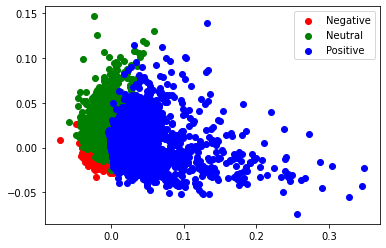

In [100]:
#Plotting the results
fig, ax = plt.subplots()
scatter0= plt.scatter(filtered_label0['x'] , filtered_label0['y'] , color = 'red')
scatter1 = plt.scatter(filtered_label1['x'] , filtered_label1['y'] , color = 'green')
scatter2 = plt.scatter(filtered_label2['x'] , filtered_label2['y'] , color = 'blue')
ax.legend([scatter0, scatter1, scatter2], ['Negative', 'Neutral', 'Positive'])

plt.show()
